In [ ]:
import sys
sys.path.append('../')

from data.LR_data import load_lr_data
from models.Logositic_Regression.logistic_regression import LogisticRegression



In [2]:
import torch

# LR

In [3]:
x_train, y_train, x_valid, y_valid, x_test, y_test = load_lr_data()

#x_train = torch.tensor(x_train, dtype=torch.float32)
#y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
#x_test = torch.tensor(x_test, dtype=torch.float32)
#y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

train_losses = []
valid_losses = []
train_accuracies = []
valid_accuracies = []
from sklearn.metrics import accuracy_score


model = LogisticRegression(x_train.shape[1])
lr = 0.1
epochs = 1000
for epoch in range(epochs):
    A, Z = model.forward(x_train)
    dW = model.compute_gradients(x_train, A, y_train)
    loss = model.compute_loss(Z, y_train)
    _,Z2 = model.forward(x_valid)
    valid_loss = model.compute_loss(Z2, y_valid)
    train_losses.append(loss.item())
    valid_losses.append(valid_loss.item())
    train_pred = model.predict(x_train)
    valid_pred = model.predict(x_valid)
    train_acc = accuracy_score(y_train, train_pred)
    valid_acc = accuracy_score(y_valid, valid_pred)
    train_accuracies.append(train_acc)
    valid_accuracies.append(valid_acc)
    
    
    model.update_params(dW, lr)

    if epoch % 10 == 0:
        print(f"Epoch {epoch}: loss = {loss.item():.4f}")



X_train shape: torch.Size([60000, 784])
Y_train shape: torch.Size([60000])
Epoch 0: loss = 0.7194
Epoch 10: loss = 0.1118
Epoch 20: loss = 0.0671
Epoch 30: loss = 0.0499
Epoch 40: loss = 0.0407
Epoch 50: loss = 0.0349
Epoch 60: loss = 0.0308
Epoch 70: loss = 0.0278
Epoch 80: loss = 0.0255
Epoch 90: loss = 0.0236
Epoch 100: loss = 0.0221
Epoch 110: loss = 0.0209
Epoch 120: loss = 0.0198
Epoch 130: loss = 0.0188
Epoch 140: loss = 0.0180
Epoch 150: loss = 0.0173
Epoch 160: loss = 0.0167
Epoch 170: loss = 0.0161
Epoch 180: loss = 0.0156
Epoch 190: loss = 0.0151
Epoch 200: loss = 0.0147
Epoch 210: loss = 0.0143
Epoch 220: loss = 0.0139
Epoch 230: loss = 0.0136
Epoch 240: loss = 0.0133
Epoch 250: loss = 0.0130
Epoch 260: loss = 0.0127
Epoch 270: loss = 0.0125
Epoch 280: loss = 0.0122
Epoch 290: loss = 0.0120
Epoch 300: loss = 0.0118
Epoch 310: loss = 0.0116
Epoch 320: loss = 0.0114
Epoch 330: loss = 0.0112
Epoch 340: loss = 0.0111
Epoch 350: loss = 0.0109
Epoch 360: loss = 0.0108
Epoch 370: 

Train Accuracy: 0.9984212900315742
Test Accuracy: 0.9989851150202977


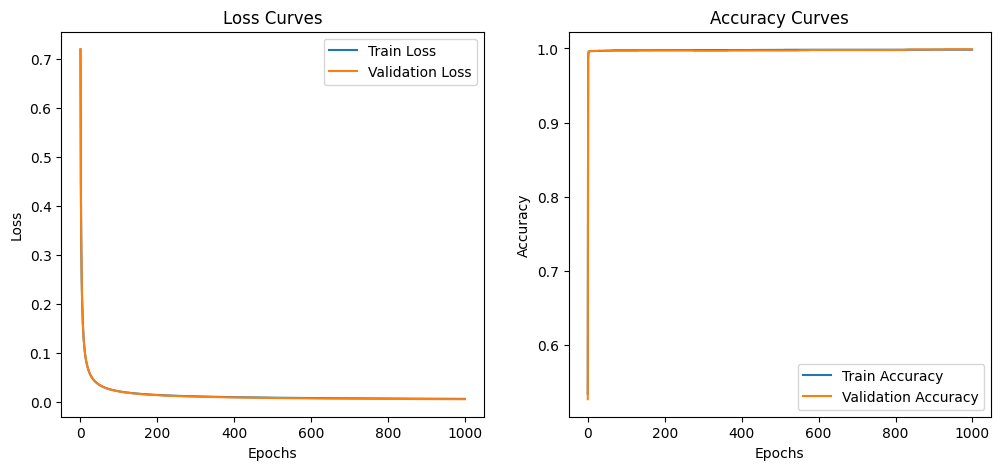

In [4]:
train_preds=model.predict(x_train)
valid_preds=model.predict(x_valid)
from sklearn.metrics import accuracy_score
print("Train Accuracy:",accuracy_score(y_train,train_preds))
print("Test Accuracy:",accuracy_score(y_valid,valid_preds))



 # test evaluation




# plot validation loss and accuracy loss curves
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.lineplot(x=range(epochs), y=train_losses, label='Train Loss')
sns.lineplot(x=range(epochs), y=valid_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curves')
plt.legend()

plt.subplot(1, 2, 2)
sns.lineplot(x=range(epochs), y=train_accuracies, label='Train Accuracy')
sns.lineplot(x=range(epochs), y=valid_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curves')
plt.legend()
plt.show()





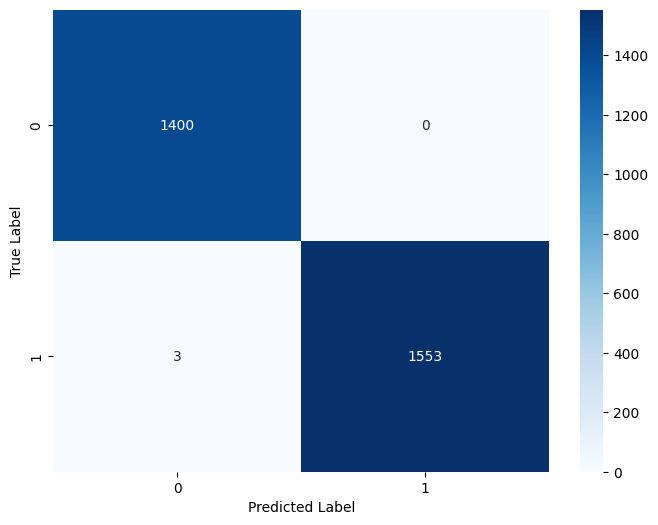

Test Accuracy: 0.9989851150202977


In [5]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# confusion matrix and accuracy on test
test_preds = model.predict(x_test)
cm = confusion_matrix(y_test, test_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

accuracy = accuracy_score(y_test, test_preds)
print("Test Accuracy:", accuracy)

-----

# SoftMax

In [6]:
from data.Softmax_data import load_softmax_data
from models.Softmax_Regression.softmax_regression import SoftmaxRegression
x_train,y_train,x_valid,y_valid,x_test,y_test = load_softmax_data()


X_train shape: torch.Size([60000, 784])
Y_train shape: torch.Size([60000])


In [7]:
model2=SoftmaxRegression(x_train.shape[1],10)
lr=0.1
epochs=1000
train_losses = []
valid_losses = []
train_accuracies = []
valid_accuracies = []


for epoch in range(epochs):
    A, Z,X_with_bias = model2.forward(x_train)
    dW = model2.compute_gradients(X_with_bias, A, y_train)
    loss = model2.compute_loss(y_train, A)
    A_valid,Z2,X_with_bias_valid = model2.forward(x_valid)
    valid_loss = model2.compute_loss(y_valid, A_valid)
    train_losses.append(loss.item())
    valid_losses.append(valid_loss.item())
    train_pred = model2.predict(x_train)
    valid_pred = model2.predict(x_valid)
    train_acc = accuracy_score(torch.argmax(y_train, dim=1), train_pred)
    valid_acc = accuracy_score(torch.argmax(y_valid, dim=1), valid_pred)
    train_accuracies.append(train_acc)
    valid_accuracies.append(valid_acc)
    model2.update_params(dW, lr)
    if epoch % 100 == 0:

     print(f"Epoch {epoch}: loss = {loss.item():.4f}")



Epoch 0: loss = 2.2841
Epoch 100: loss = 0.6071
Epoch 200: loss = 0.4883
Epoch 300: loss = 0.4394
Epoch 400: loss = 0.4113
Epoch 500: loss = 0.3925
Epoch 600: loss = 0.3787
Epoch 700: loss = 0.3680
Epoch 800: loss = 0.3594
Epoch 900: loss = 0.3523


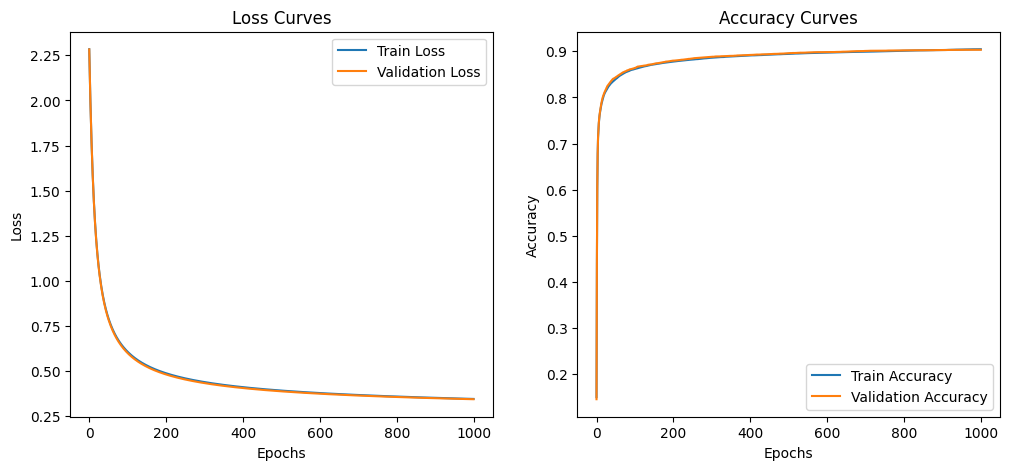

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.lineplot(x=range(epochs), y=train_losses, label='Train Loss')
sns.lineplot(x=range(epochs), y=valid_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curves')
plt.legend()
plt.subplot(1, 2, 2)
sns.lineplot(x=range(epochs), y=train_accuracies, label='Train Accuracy')
sns.lineplot(x=range(epochs), y=valid_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')    
plt.ylabel('Accuracy')
plt.title('Accuracy Curves')
plt.legend()
plt.show()
train_preds=model2.predict(x_train)
valid_preds=model2.predict(x_valid)

Test Accuracy: 90.58%


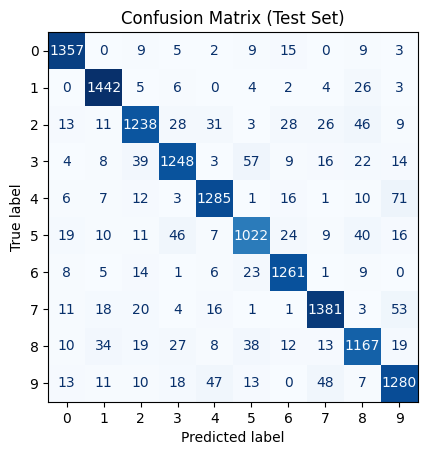

In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
#y_pred_train = model2.predict(x_train)
y_pred_test = model2.predict(x_test)
#train_acc = accuracy_score(torch.argmax(y_train, dim=1), y_pred_train)
test_acc = accuracy_score(torch.argmax(y_test, dim=1)
, y_pred_test)

#print(f" Training Accuracy: {train_acc * 100:.2f}%")
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# ---------- Confusion Matrix ----------
cm = confusion_matrix(torch.argmax(y_test, dim=1), y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', colorbar=False)
plt.title("Confusion Matrix (Test Set)")
plt.show()

In [10]:
from sklearn.metrics import classification_report

# after you compute y_pred_test
y_true = torch.argmax(y_test, dim=1)
print(classification_report(y_true, y_pred_test, digits=4))


              precision    recall  f1-score   support

           0     0.9417    0.9631    0.9523      1409
           1     0.9327    0.9665    0.9493      1492
           2     0.8991    0.8639    0.8811      1433
           3     0.9004    0.8789    0.8895      1420
           4     0.9146    0.9101    0.9123      1412
           5     0.8728    0.8488    0.8606      1204
           6     0.9218    0.9495    0.9355      1328
           7     0.9213    0.9158    0.9185      1508
           8     0.8715    0.8664    0.8690      1347
           9     0.8719    0.8846    0.8782      1447

    accuracy                         0.9058     14000
   macro avg     0.9048    0.9048    0.9046     14000
weighted avg     0.9055    0.9058    0.9055     14000



-----

# NN

In [11]:
from  models.Neural_Networks.neural_networks import MyNN
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def train_model(model, train_loader, val_loader, criterion, optimizer, epochs=5):
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)

    for epoch in range(epochs):
        model.train()
        running_loss, correct, total = 0.0, 0, 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device) 
            outputs = model(images.view(images.size(0), -1)) #forward pass [10,batchsize]
            loss = criterion(outputs, labels) #b7sb el looos(cross entropy loss)
            optimizer.zero_grad() #backprop bms7 el wrigths el 2dima
            loss.backward()#backprop
            optimizer.step()
            running_loss += loss.item()#compute loss for this batch
            _, predicted = torch.max(outputs.data, 1) #i have list with 10 probabilites and i take the index of biggest one
            total += labels.size(0) # number of imahges in bitch
            correct += (predicted == labels).sum().item()#here i have list of true and flas then i take sum of true and convert it a number 3ady not torchy

        train_loss = running_loss / len(train_loader) #calculate average loss for batch
        train_acc = 100 * correct / total

        model.eval() # now time to validation data  same in the train
        val_loss, val_correct, val_total = 0.0, 0, 0
        with torch.no_grad(): #we validate not train
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images.view(images.size(0), -1))
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()

        val_loss = val_loss / len(val_loader)
        val_acc = 100 * val_correct / val_total

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_acc)
        val_accuracies.append(val_acc)

    return train_losses, val_losses, train_accuracies, val_accuracies


transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)) #normalize [0,1]to[-1,1] to make model learn fast and better becaue distribution will be uniformed with mean and std=0.5
])

dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Split: 60% train, 20% val, 20% test
train_size = int(0.6 * len(dataset))
val_size = int(0.2 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=20, shuffle=False)

criterion = nn.CrossEntropyLoss()

model = MyNN(input_size=784, hidden_layers=[256,128,64], output_size=10)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

train_losses, val_losses, train_accs, val_accs = train_model(
    model, train_loader, val_loader, criterion, optimizer, epochs=5
)


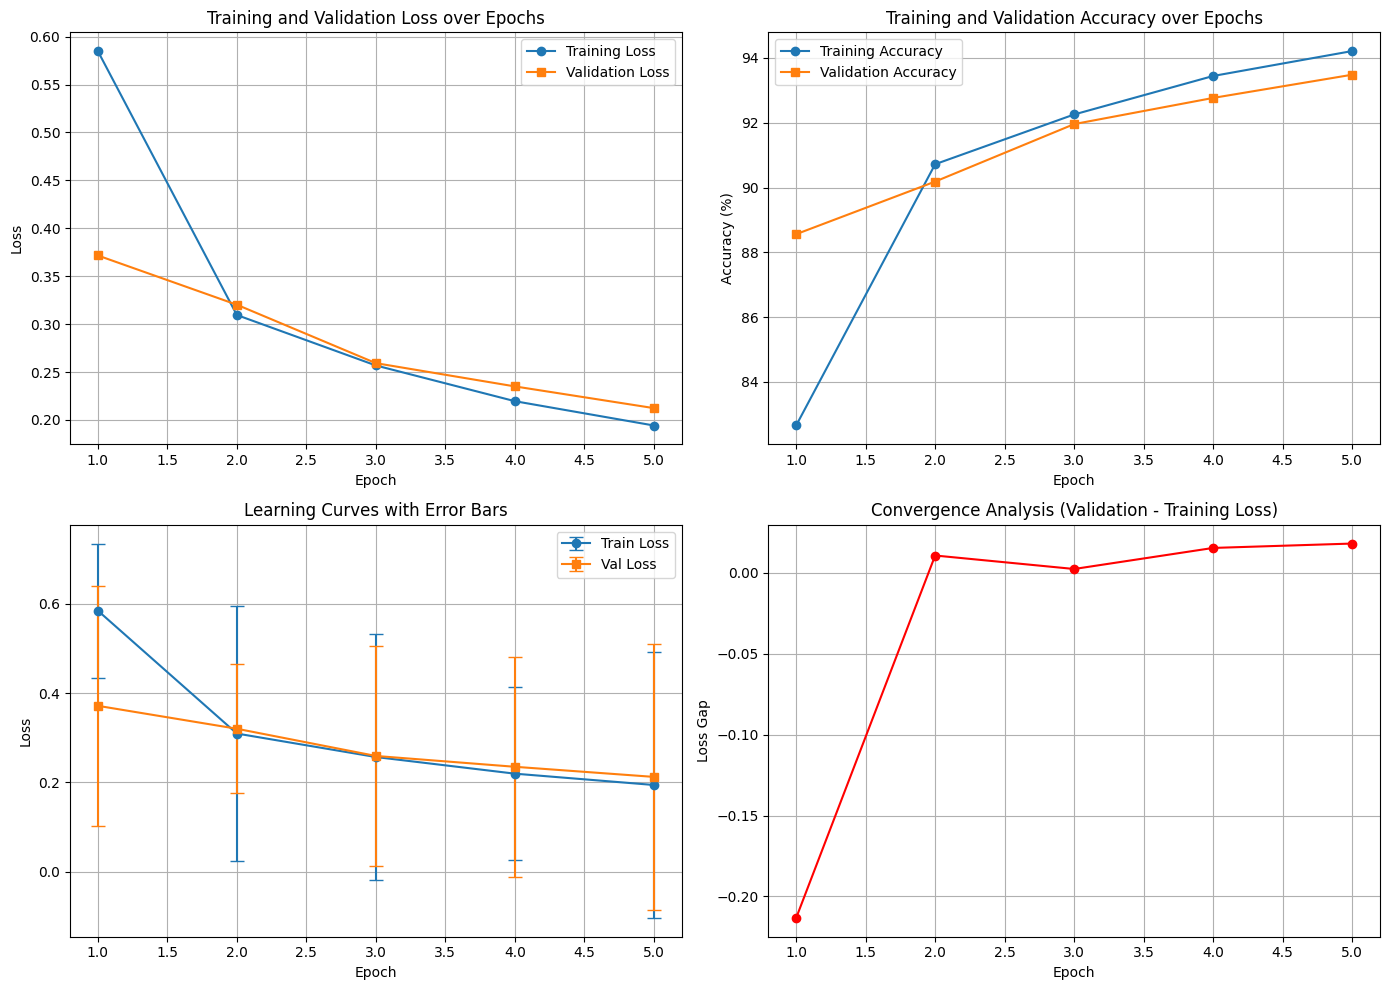

In [12]:
epochs = range(1, len(train_losses) + 1)
plt.figure(figsize=(14, 10))
#Training vs Validation Loss
plt.subplot(2, 2, 1)
plt.plot(epochs, train_losses, label="Training Loss", marker='o')
plt.plot(epochs, val_losses, label="Validation Loss", marker='s')
plt.title("Training and Validation Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

#Training vs Validation Accuracy
plt.subplot(2, 2, 2)
plt.plot(epochs, train_accs, label="Training Accuracy", marker='o')
plt.plot(epochs, val_accs, label="Validation Accuracy", marker='s')
plt.title("Training and Validation Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.grid(True)

#learning Curves with Error Bars
train_std = np.random.uniform(0.1, 0.3, len(train_losses))
val_std = np.random.uniform(0.1, 0.3, len(val_losses))
plt.subplot(2, 2, 3)
plt.errorbar(epochs, train_losses, yerr=train_std, fmt='-o', capsize=5, label='Train Loss')
plt.errorbar(epochs, val_losses, yerr=val_std, fmt='-s', capsize=5, label='Val Loss')
plt.title("Learning Curves with Error Bars")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

#Convergence Analysis
gap = np.array(val_losses) - np.array(train_losses)
plt.subplot(2, 2, 4)
plt.plot(epochs, gap, marker='o', color='red')
plt.title("Convergence Analysis (Validation - Training Loss)")
plt.xlabel("Epoch")
plt.ylabel("Loss Gap")
plt.grid(True)

plt.tight_layout()
plt.show()

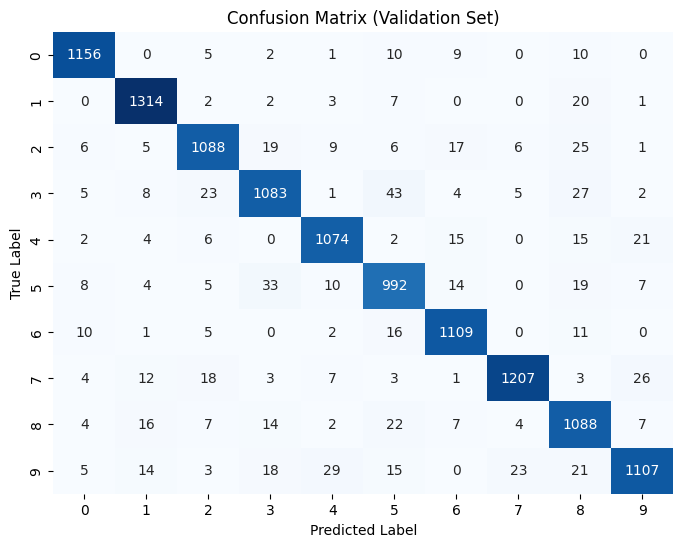

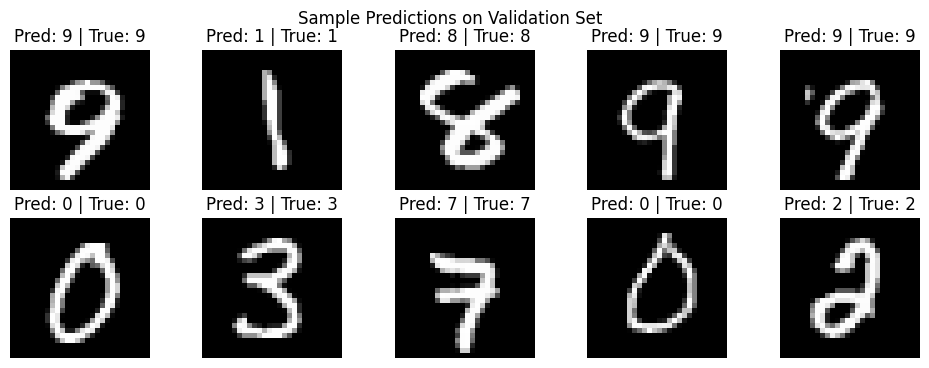

In [13]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in val_loader:
        images = images.view(images.size(0), -1)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix (Validation Set)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

examples = iter(val_loader)
images, labels = next(examples)
images_flat = images.view(images.size(0), -1)

with torch.no_grad():
    outputs = model(images_flat)
    _, preds = torch.max(outputs, 1)
plt.figure(figsize=(12, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(images[i][0], cmap='gray')
    plt.title(f"Pred: {preds[i].item()} | True: {labels[i].item()}")
    plt.axis('off')
plt.suptitle("Sample Predictions on Validation Set")
plt.show()

-----

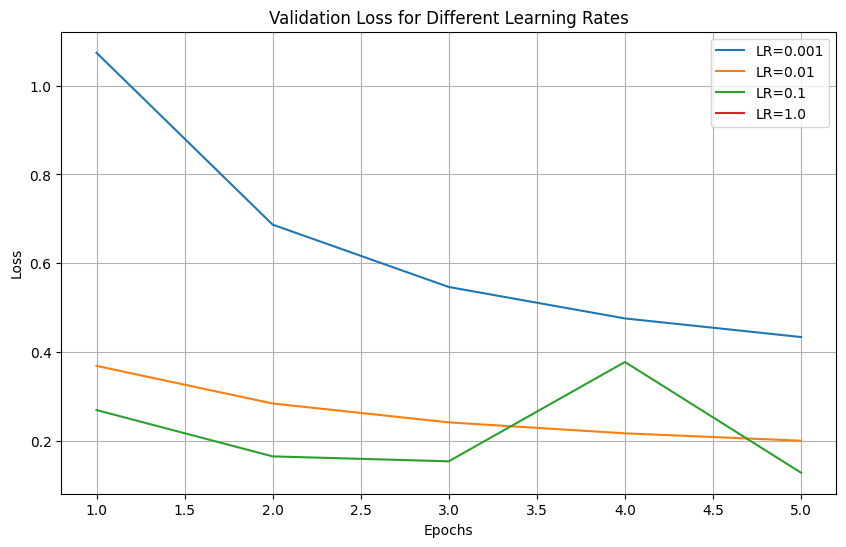


 Learning Rate Comparison Table:
    Learning Rate  Final Validation Accuracy (%)
0          0.001                          87.59
1          0.010                          93.97
2          0.100                          96.19
3          1.000                           9.94


In [14]:
learning_rates = [0.001, 0.01, 0.1, 1.0]
results_lr = []  

plt.figure(figsize=(10, 6))

for lr in learning_rates:
    model = MyNN(784, [256, 128, 64], 10)
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)

    train_losses, val_losses, train_accs, val_accs = train_model(
        model,
        DataLoader(train_dataset, batch_size=64, shuffle=True),
        DataLoader(val_dataset, batch_size=64, shuffle=False),
        criterion,
        optimizer,
        epochs=5
    )

    plt.plot(range(1, len(val_losses) + 1), val_losses, label=f"LR={lr}")

    results_lr.append({
        "Learning Rate": lr,
        "Final Validation Accuracy (%)": round(val_accs[-1], 2)
    })

plt.title("Validation Loss for Different Learning Rates")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

df_lr = pd.DataFrame(results_lr)
print("\n Learning Rate Comparison Table:\n", df_lr)

----

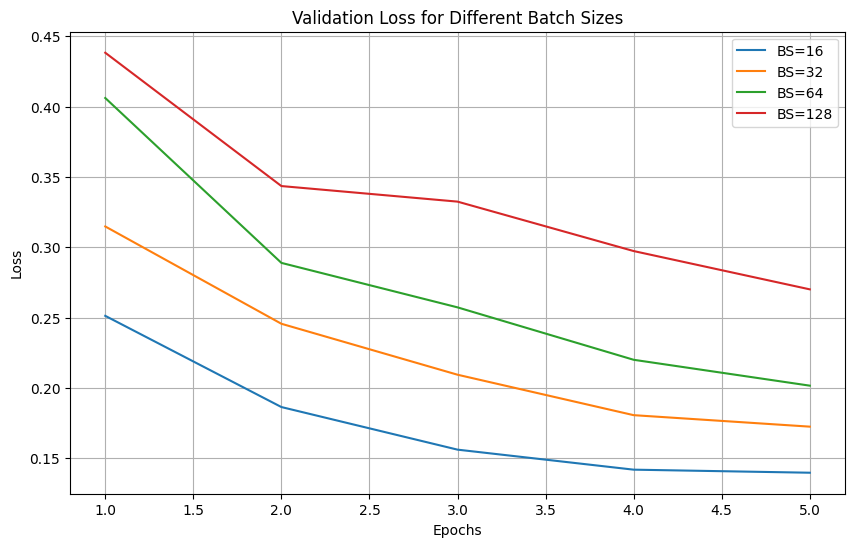


 Batch Size Comparison Table:
    Batch Size  Final Val Accuracy (%)  Avg Time per Epoch (s)
0          16                   95.90                    9.38
1          32                   94.89                    8.62
2          64                   93.92                    7.66
3         128                   92.03                    7.27


In [15]:
import time
import matplotlib.pyplot as plt
import pandas as pd
from torch.utils.data import DataLoader


batch_sizes = [16, 32, 64, 128]
results_bs = []
plt.figure(figsize=(10, 6))

for bs in batch_sizes:
    train_loader = DataLoader(train_dataset, batch_size=bs, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=bs, shuffle=False)
    model = MyNN(784, [256, 128, 64], 10)
    optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

    start_time = time.time()
    _, val_losses, _, val_accs = train_model(model, train_loader, val_loader, criterion, optimizer, epochs=5)
    duration = (time.time() - start_time) / 5 
    results_bs.append({
        "Batch Size": bs,
        "Final Val Accuracy (%)": round(val_accs[-1], 2),
        "Avg Time per Epoch (s)": round(duration, 2)
    })

    plt.plot(range(1, 6), val_losses, label=f"BS={bs}")  

plt.title("Validation Loss for Different Batch Sizes")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

df_bs = pd.DataFrame(results_bs)
print("\n Batch Size Comparison Table:\n", df_bs)

____

In [16]:
architectures = {
    "2 Layers [64,64]": [64, 64],
    "3 Layers [128,128,128]": [128, 128, 128],
    "4 Layers [256,256,256,256]": [256, 256, 256, 256],
    "5 Layers [512,512,512,512,512]": [512, 512, 512, 512, 512]
}

results_arch = []
for name, arch in architectures.items():
    model = MyNN(784, arch, 10)
    optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
    _, val_losses, _, val_accs = train_model(model,
                                             DataLoader(train_dataset, batch_size=64, shuffle=True),
                                             DataLoader(val_dataset, batch_size=64, shuffle=False),
                                             criterion, optimizer, epochs=10)
    num_params = sum(p.numel() for p in model.parameters())
    results_arch.append({
        "Architecture": name,
        "Layers": len(arch),
        "Neurons per Layer": str(arch),
        "Final Val Accuracy (%)": round(val_accs[-1], 2),
        "Best Epoch": np.argmin(val_losses) + 1,
        "Total Parameters": num_params
    })

df_arch = pd.DataFrame(results_arch)
print("\n Architecture Comparison Table:\n", df_arch)


 Architecture Comparison Table:
                      Architecture  Layers          Neurons per Layer  \
0                2 Layers [64,64]       2                   [64, 64]   
1          3 Layers [128,128,128]       3            [128, 128, 128]   
2      4 Layers [256,256,256,256]       4       [256, 256, 256, 256]   
3  5 Layers [512,512,512,512,512]       5  [512, 512, 512, 512, 512]   

   Final Val Accuracy (%)  Best Epoch  Total Parameters  
0                   94.09          10             55050  
1                   94.99           9            134794  
2                   94.78           7            400906  
3                   96.63          10           1457674  


### Best Model Evaluation

In [17]:
criterion = nn.CrossEntropyLoss()

model99 = MyNN(input_size=784, hidden_layers=[256,128,64], output_size=10)
optimizer = torch.optim.SGD(model99.parameters(), lr=0.1)

train_losses, val_losses, train_accs, val_accs = train_model(
    model99, train_loader, val_loader, criterion, optimizer, epochs=5
)


In [18]:
from sklearn.metrics import confusion_matrix, classification_report
import torch

# Evaluate on test set
model99.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.view(images.size(0), -1)  # flatten 28x28 → 784
        outputs = model99(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Confusion matrix
cm = confusion_matrix(all_labels, all_preds)
print("Confusion Matrix:")
print(cm)

# Classification report
print("\nClassification Report:")
print(classification_report(all_labels, all_preds, digits=4))


Confusion Matrix:
[[1161    0    2    0    3    0    3    3    6    6]
 [   0 1325    9    4    3    0    0    3    7    2]
 [   3    2 1156    6   20    0    5    7   15    2]
 [   1    0   17 1155    1    3    1    8   15   28]
 [   0    3    3    0 1119    0    8    1    6   18]
 [  11    2    2   67   15  823   34    2   86   79]
 [   4    2    2    1    4    0 1134    0    7    2]
 [   0    4   10    2   13    0    1 1204    2   15]
 [   3    3    1   12    3    1    4    2 1115   13]
 [   4    3    1    3   25    0    0    8    9 1122]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9781    0.9806    0.9793      1184
           1     0.9859    0.9793    0.9826      1353
           2     0.9609    0.9507    0.9558      1216
           3     0.9240    0.9398    0.9318      1229
           4     0.9279    0.9663    0.9467      1158
           5     0.9952    0.7342    0.8450      1121
           6     0.9529    0.9810    0.9668     

<Figure size 800x800 with 0 Axes>

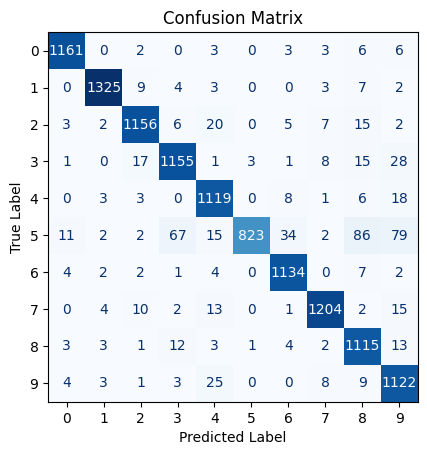

In [49]:
cm = confusion_matrix(all_labels, all_preds)

plt.figure(figsize=(8, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', colorbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### insights

| True Digit | Often Misclassified As | Reason                                          |
| :--------- | :--------------------- | :---------------------------------------------- |
| **5**      | 3, 8, 9                | Shared round/loop shapes; handwriting variance. |
| **8**      | 3 or 9                 | Upper and lower loops confuse the network.      |
| **9**      | 4 or 8                 | Similar tails and closed loops.                 |
| **3**      | 8 or 5                 | Curved structures similar in shape.             |


#### Conclusion
These misclassifications likely occurred because the model is a fully connected neural network, which treats each pixel independently and does not capture the spatial relationships between nearby pixels. As a result, digits with similar overall patterns  such as 3, 5, 8, and 9  can look similar to the model, leading to confusion. Without convolutional layers, the NN cannot effectively learn shape or stroke structure, only pixel-level intensity pattern

-----

# CNN

In [33]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential 
from tensorflow.keras import layers
import numpy as np

In [34]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [35]:
X_all = np.concatenate([train_images, test_images], axis=0)
y_all = np.concatenate([train_labels, test_labels], axis=0)

In [46]:
from sklearn.model_selection import train_test_split
x_train, temp_images, y_train, temp_labels = train_test_split(X_all, y_all, test_size=0.4, random_state=42)
x_valid, x_test, y_valid, y_test = train_test_split(temp_images, temp_labels, test_size=0.5, random_state=42)

In [37]:
train_images.shape

(60000, 28, 28)

In [38]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [39]:
x_train.shape

(42000, 28, 28)

In [40]:
x_train =x_train / 255.0
x_valid = x_valid / 255.0
x_test = test_images / 255.0

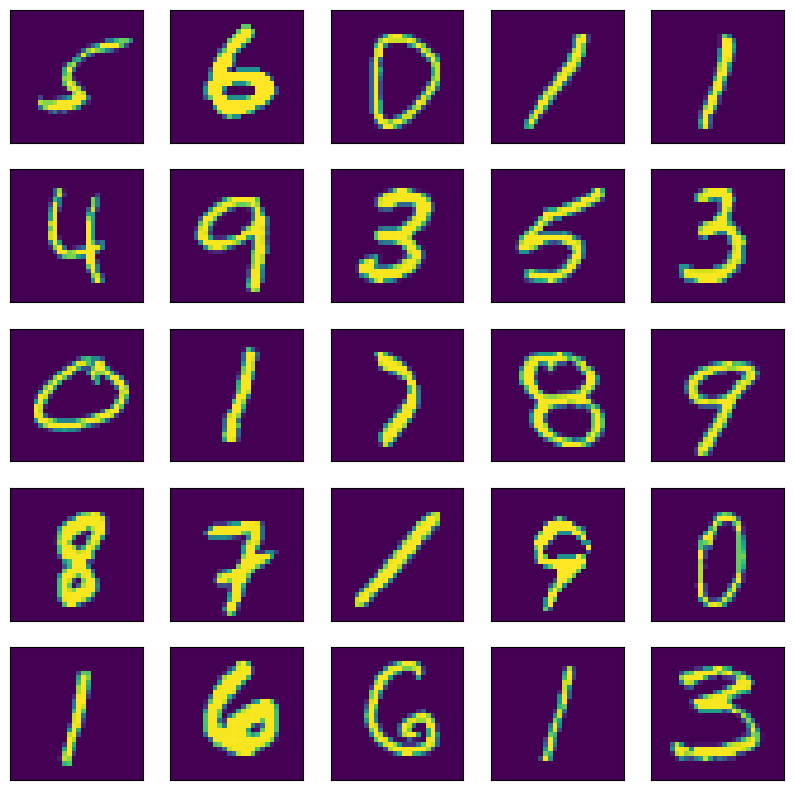

In [41]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    
plt.show()

In [42]:
model5 = Sequential()
model5.add(layers.Input((28,28,1)))
model5.add(layers.Conv2D(32, (3, 3), activation='relu',padding='same')) # 26,26,32
model5.add(layers.MaxPooling2D((2, 2))) #13,13,32
model5.add(layers.Conv2D(64, (3, 3), activation='relu',padding='same')) # 11 , 11, 64
model5.add(layers.MaxPooling2D((2, 2))) # 5,5,64
model5.add(layers.Flatten()) #1600
model5.add(layers.Dense(128, activation='relu'))
model5.add(layers.Dense(32, activation='relu'))
model5.add(layers.Dense(10, activation='softmax'))

In [43]:
model5.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 424,810 (1.62 MB)

 Trainable params: 424,810 (1.62 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
import tensorflow as tf
model5.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history5 = model5.fit(x_train, y_train, epochs=6,validation_data=(x_valid,y_valid),
                   )

Epoch 1/6
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8694 - loss: 0.4114 - val_accuracy: 0.9759 - val_loss: 0.0784
Epoch 2/6
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9828 - loss: 0.0552 - val_accuracy: 0.9861 - val_loss: 0.0453
Epoch 3/6
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9892 - loss: 0.0357 - val_accuracy: 0.9861 - val_loss: 0.0452
Epoch 4/6
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9918 - loss: 0.0268 - val_accuracy: 0.9882 - val_loss: 0.0380
Epoch 5/6
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9944 - loss: 0.0171 - val_accuracy: 0.9866 - val_loss: 0.0461
Epoch 6/6
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9960 - loss: 0.0126 - val_accuracy: 0.9870 - val_loss: 0.0477


438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9805 - loss: 15.7816


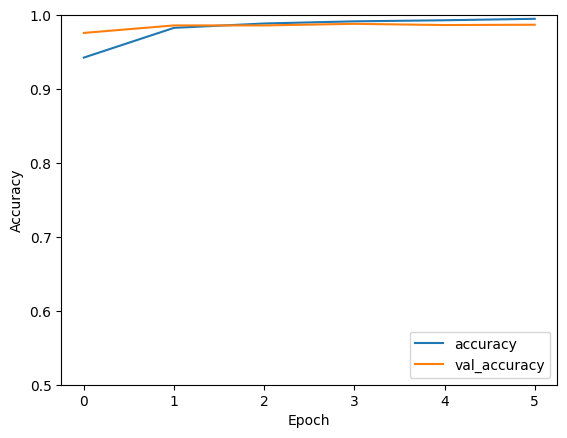

In [47]:
plt.plot(history5.history['accuracy'], label='accuracy')
plt.plot(history5.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss5, test_acc5 = model5.evaluate(x_test,  y_test)

In [ ]:
print(test_acc5)

0.9857142567634583


----

Epoch 1/6
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8696 - loss: 0.4183 - val_accuracy: 0.9823 - val_loss: 0.0586
Epoch 2/6
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9801 - loss: 0.0657 - val_accuracy: 0.9864 - val_loss: 0.0426
Epoch 3/6
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9881 - loss: 0.0392 - val_accuracy: 0.9862 - val_loss: 0.0428
Epoch 4/6
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9903 - loss: 0.0318 - val_accuracy: 0.9897 - val_loss: 0.0342
Epoch 5/6
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9916 - loss: 0.0258 - val_accuracy: 0.9886 - val_loss: 0.0401
Epoch 6/6
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9929 - loss: 0.0203 - val_accuracy: 0.9891 - val_loss: 0.0354


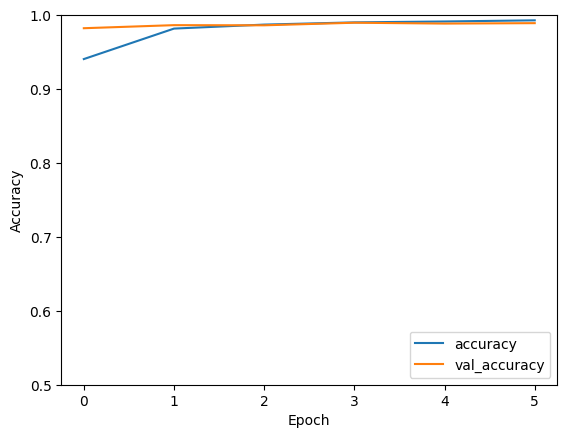

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9878 - loss: 0.0475

Test Loss: 0.0496
Test Accuracy: 98.69%


In [ ]:
model6 = Sequential()
model6.add(layers.Input((28,28,1)))
model6.add(layers.Conv2D(32, (3, 3), activation='relu',padding='same')) # 28,28,32 (due to 'same')
model6.add(layers.MaxPooling2D((2, 2))) # 14,14,32
model6.add(layers.Conv2D(64, (3, 3), activation='relu',padding='same')) # 14,14,64 (due to 'same')
model6.add(layers.MaxPooling2D((2, 2))) # 7,7,64
model6.add(layers.Flatten()) # 7*7*64 = 3136
model6.add(layers.Dropout(0.1))
model6.add(layers.Dense(128, activation='relu'))
model6.add(layers.Dropout(0.1))
model6.add(layers.Dense(32, activation='relu'))
model6.add(layers.Dense(10, activation='softmax'))

model6.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
              metrics=['accuracy'])

history6 = model6.fit(x_train, y_train, epochs=6, validation_data=(x_valid, y_valid))

plt.plot(history6.history['accuracy'], label='accuracy')
plt.plot(history6.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show() 


test_loss6, test_acc6 = model6.evaluate(x_test,  y_test)
print(f"\nTest Loss: {test_loss6:.4f}")
print(f"Test Accuracy: {test_acc6*100:.2f}%")

----

Epoch 1/6
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8376 - loss: 0.4969 - val_accuracy: 0.9814 - val_loss: 0.0572
Epoch 2/6
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9735 - loss: 0.0842 - val_accuracy: 0.9863 - val_loss: 0.0431
Epoch 3/6
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9810 - loss: 0.0622 - val_accuracy: 0.9882 - val_loss: 0.0377
Epoch 4/6
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9855 - loss: 0.0470 - val_accuracy: 0.9871 - val_loss: 0.0425
Epoch 5/6
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9869 - loss: 0.0412 - val_accuracy: 0.9886 - val_loss: 0.0395
Epoch 6/6
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9877 - loss: 0.0367 - val_accuracy: 0.9902 - val_loss: 0.0321


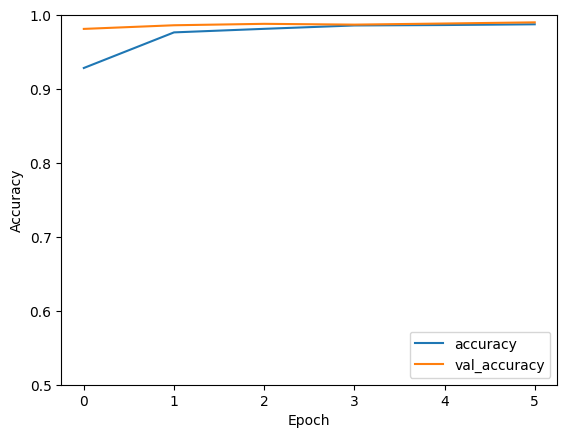

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9906 - loss: 0.0306

Test Loss: 0.0360
Test Accuracy: 98.87%


In [ ]:
model7 = Sequential()
model7.add(layers.Input((28,28,1)))
model7.add(layers.Conv2D(32, (3, 3), activation='relu',padding='same')) # 28,28,32 
model7.add(layers.MaxPooling2D((2, 2))) # 14,14,32
model7.add(layers.Conv2D(64, (3, 3), activation='relu',padding='same')) # 14,14,64 
model7.add(layers.MaxPooling2D((2, 2))) # 7,7,64
model7.add(layers.Flatten()) # 7*7*64 = 3136
model7.add(layers.Dropout(0.3))
model7.add(layers.Dense(128, activation='relu'))
model7.add(layers.Dropout(0.3))
model7.add(layers.Dense(32, activation='relu'))
model7.add(layers.Dense(10, activation='softmax')) 

model7.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
              metrics=['accuracy'])

history7 = model7.fit(x_train, y_train, epochs=6, validation_data=(x_valid, y_valid))

plt.plot(history7.history['accuracy'], label='accuracy')
plt.plot(history7.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show() 

test_loss7, test_acc7 = model7.evaluate(x_test,  y_test)
print(f"\nTest Loss: {test_loss7:.4f}")
print(f"Test Accuracy: {test_acc7*100:.2f}%")

-----

Epoch 1/6
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7824 - loss: 0.6512 - val_accuracy: 0.9749 - val_loss: 0.0824
Epoch 2/6
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9621 - loss: 0.1286 - val_accuracy: 0.9841 - val_loss: 0.0502
Epoch 3/6
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9708 - loss: 0.0972 - val_accuracy: 0.9814 - val_loss: 0.0617
Epoch 4/6
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9753 - loss: 0.0794 - val_accuracy: 0.9889 - val_loss: 0.0374
Epoch 5/6
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9789 - loss: 0.0712 - val_accuracy: 0.9885 - val_loss: 0.0354
Epoch 6/6
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9811 - loss: 0.0665 - val_accuracy: 0.9886 - val_loss: 0.0342


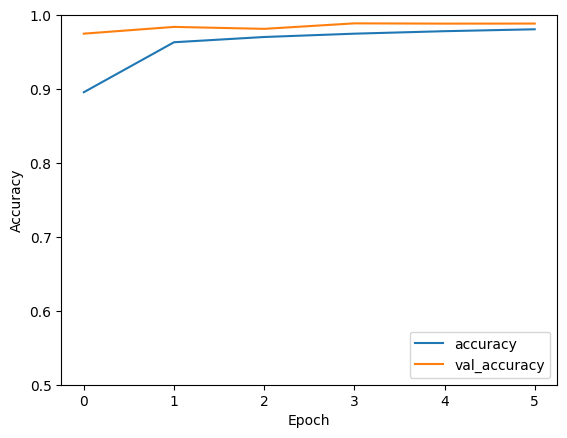

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9883 - loss: 0.0362

Test Loss: 0.0383
Test Accuracy: 98.76%


In [ ]:
model8 = Sequential()
model8.add(layers.Input((28,28,1)))
model8.add(layers.Conv2D(32, (3, 3), activation='relu',padding='same')) # 28,28,32 (due to 'same')
model8.add(layers.MaxPooling2D((2, 2))) # 14,14,32
model8.add(layers.Conv2D(64, (3, 3), activation='relu',padding='same')) # 14,14,64 (due to 'same')
model8.add(layers.MaxPooling2D((2, 2))) # 7,7,64
model8.add(layers.Flatten()) # 7*7*64 = 3136
model8.add(layers.Dropout(0.5))
model8.add(layers.Dense(128, activation='relu'))
model8.add(layers.Dropout(0.5))
model8.add(layers.Dense(32, activation='relu'))
model8.add(layers.Dense(10, activation='softmax')) 

model8.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
              metrics=['accuracy'])

# 2. Renamed history7 to history8 and used model8
history8 = model8.fit(x_train, y_train, epochs=6, validation_data=(x_valid, y_valid))

# 3. Renamed history7.history to history8.history
plt.plot(history8.history['accuracy'], label='accuracy')
plt.plot(history8.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show() 

# 4. Renamed model7.evaluate to model8.evaluate
test_loss8, test_acc8 = model8.evaluate(x_test,  y_test)
print(f"\nTest Loss: {test_loss8:.4f}")
print(f"Test Accuracy: {test_acc8*100:.2f}%")

-----

Epoch 1/6
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6717 - loss: 0.9642 - val_accuracy: 0.9698 - val_loss: 0.1026
Epoch 2/6
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9182 - loss: 0.2745 - val_accuracy: 0.9765 - val_loss: 0.0749
Epoch 3/6
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9384 - loss: 0.2069 - val_accuracy: 0.9815 - val_loss: 0.0597
Epoch 4/6
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9477 - loss: 0.1805 - val_accuracy: 0.9832 - val_loss: 0.0545
Epoch 5/6
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9492 - loss: 0.1687 - val_accuracy: 0.9831 - val_loss: 0.0522
Epoch 6/6
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9569 - loss: 0.1463 - val_accuracy: 0.9863 - val_loss: 0.0456


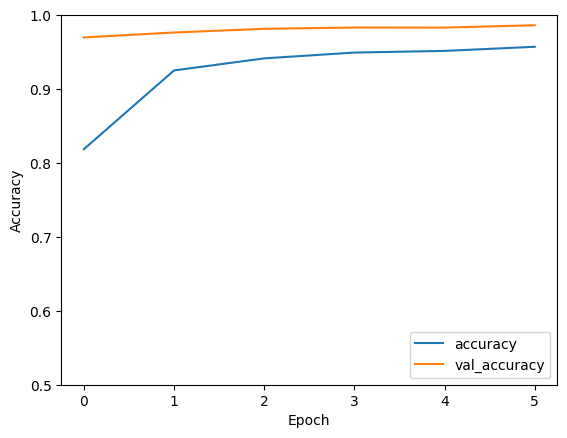

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9861 - loss: 0.0516

Test Loss: 0.0537
Test Accuracy: 98.37%


In [ ]:
model9 = Sequential()
model9.add(layers.Input((28,28,1)))
model9.add(layers.Conv2D(32, (3, 3), activation='relu',padding='same')) # 28,28,32 (due to 'same')
model9.add(layers.MaxPooling2D((2, 2))) # 14,14,32
model9.add(layers.Conv2D(64, (3, 3), activation='relu',padding='same')) # 14,14,64 (due to 'same')
model9.add(layers.MaxPooling2D((2, 2))) # 7,7,64
model9.add(layers.Flatten()) # 7*7*64 = 3136
model9.add(layers.Dropout(0.7))
model9.add(layers.Dense(128, activation='relu'))
model9.add(layers.Dropout(0.7))
model9.add(layers.Dense(32, activation='relu'))
model9.add(layers.Dense(10, activation='softmax')) 

model9.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
              metrics=['accuracy'])

# 2. Renamed history8 to history9 and used model9
history9 = model9.fit(x_train, y_train, epochs=6, validation_data=(x_valid, y_valid))

# 3. Renamed history8.history to history9.history
plt.plot(history9.history['accuracy'], label='accuracy')
plt.plot(history9.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show() 

# 4. Renamed model8.evaluate to model9.evaluate
test_loss9, test_acc9 = model9.evaluate(x_test,  y_test)
print(f"\nTest Loss: {test_loss9:.4f}")
print(f"Test Accuracy: {test_acc9*100:.2f}%")

-----

Epoch 1/6
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9301 - loss: 0.3196 - val_accuracy: 0.9829 - val_loss: 0.0544
Epoch 2/6
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.9854 - loss: 0.0518 - val_accuracy: 0.9873 - val_loss: 0.0396
Epoch 3/6
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.9884 - loss: 0.0372 - val_accuracy: 0.9866 - val_loss: 0.0438
Epoch 4/6
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.9926 - loss: 0.0242 - val_accuracy: 0.9867 - val_loss: 0.0415
Epoch 5/6
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.9930 - loss: 0.0219 - val_accuracy: 0.9917 - val_loss: 0.0260
Epoch 6/6
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.9954 - loss: 0.0144 - val_accuracy: 0.9896 - val_loss: 0.0348


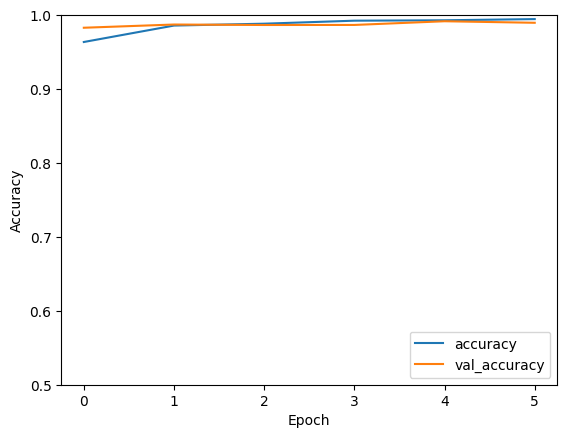

438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9894 - loss: 0.0369

Test Loss: 0.0382
Test Accuracy: 98.87%


In [ ]:
model10 = Sequential()

# Input
model10.add(layers.Input((28,28,1)))

# --- Conv Block 1 ---
model10.add(layers.Conv2D(32, (3, 3), padding='same'))
model10.add(layers.BatchNormalization())
model10.add(layers.Activation('relu'))
model10.add(layers.MaxPooling2D((2, 2)))  # 14x14x32

# --- Conv Block 2 ---
model10.add(layers.Conv2D(64, (3, 3), padding='same'))
model10.add(layers.BatchNormalization())
model10.add(layers.Activation('relu'))
model10.add(layers.MaxPooling2D((2, 2)))  # 7x7x64

# --- Fully Connected Part ---
model10.add(layers.Flatten())  # 7*7*64 = 3136

model10.add(layers.Dense(128))
model10.add(layers.BatchNormalization())
model10.add(layers.Activation('relu'))

model10.add(layers.Dense(32))
model10.add(layers.BatchNormalization())
model10.add(layers.Activation('relu'))

# --- Output ---
model10.add(layers.Dense(10, activation='softmax'))  # Output layer

model10.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
              metrics=['accuracy'])

# 2. Renamed history9 to history10 and used model10
history10 = model10.fit(x_train, y_train, epochs=6, validation_data=(x_valid, y_valid))

# 3. Renamed history9.history to history10.history
plt.plot(history10.history['accuracy'], label='accuracy')
plt.plot(history10.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show() 

# 4. Renamed model9.evaluate to model10.evaluate
test_loss10, test_acc10 = model10.evaluate(x_test,  y_test)
print(f"\nTest Loss: {test_loss10:.4f}")
print(f"Test Accuracy: {test_acc10*100:.2f}%")

-------

Epoch 1/6
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.7572 - loss: 0.8272 - val_accuracy: 0.9776 - val_loss: 0.0730
Epoch 2/6
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.9296 - loss: 0.2448 - val_accuracy: 0.9803 - val_loss: 0.0645
Epoch 3/6
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.9465 - loss: 0.1859 - val_accuracy: 0.9883 - val_loss: 0.0398
Epoch 4/6
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.9549 - loss: 0.1614 - val_accuracy: 0.9877 - val_loss: 0.0429
Epoch 5/6
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.9594 - loss: 0.1379 - val_accuracy: 0.9889 - val_loss: 0.0384
Epoch 6/6
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.9641 - loss: 0.1222 - val_accuracy: 0.9904 - val_loss: 0.0331


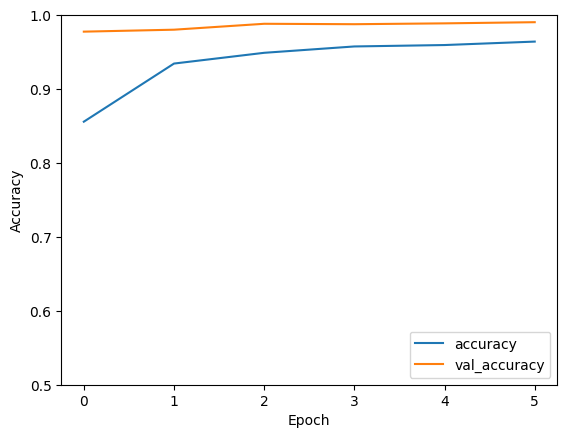

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9904 - loss: 0.0361

Test Loss: 0.0375
Test Accuracy: 98.94%


In [51]:
from tensorflow.keras import layers, Sequential

model11 = Sequential()

# --- Conv Block 1 ---
model11.add(layers.Input((28, 28, 1)))
model11.add(layers.Conv2D(32, (3, 3), padding='same'))
model11.add(layers.BatchNormalization())
model11.add(layers.Activation('relu'))
model11.add(layers.MaxPooling2D((2, 2)))  # 14×14×32

# --- Conv Block 2 ---
model11.add(layers.Conv2D(64, (3, 3), padding='same'))
model11.add(layers.BatchNormalization())
model11.add(layers.Activation('relu'))
model11.add(layers.MaxPooling2D((2, 2)))  # 7×7×64

# --- Fully Connected Part ---
model11.add(layers.Flatten())  # 7*7*64 = 3136

# Dense 1
model11.add(layers.Dense(128))
model11.add(layers.BatchNormalization())
model11.add(layers.Activation('relu'))
model11.add(layers.Dropout(0.5))

# Dense 2
model11.add(layers.Dense(32))
model11.add(layers.BatchNormalization())
model11.add(layers.Activation('relu'))
model11.add(layers.Dropout(0.5))

# Output
model11.add(layers.Dense(10, activation='softmax'))

# --- Compile ---
model11.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


# 2. Renamed history10 to history11 and used model11
history11 = model11.fit(x_train, y_train, epochs=6, validation_data=(x_valid, y_valid))

# 3. Renamed history10.history to history11.history
plt.plot(history11.history['accuracy'], label='accuracy')
plt.plot(history11.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show() 

# 4. Renamed model10.evaluate to model11.evaluate
test_loss11, test_acc11 = model11.evaluate(x_test,  y_test)
print(f"\nTest Loss: {test_loss11:.4f}")
print(f"Test Accuracy: {test_acc11*100:.2f}%")

-----

## Evalute

In [ ]:
import pandas as pd

# Create a comparison table
data = {
    'Model': [
        'Model 5: Baseline',
        'Model 6: Dropout 0.1',
        'Model 7: Dropout 0.3',
        'Model 8: Dropout 0.5',
        'Model 9: Dropout 0.7',
        'Model 10: BatchNorm',
        'Model 11: BatchNorm + Dropout'
    ],
    'Train Accuracy (%)': [
        history5.history['accuracy'][-1] * 100,
        history6.history['accuracy'][-1] * 100,
        history7.history['accuracy'][-1] * 100,
        history8.history['accuracy'][-1] * 100,
        history9.history['accuracy'][-1] * 100,
        history10.history['accuracy'][-1] * 100,
        history11.history['accuracy'][-1] * 100
    ],
    'Validation Accuracy (%)': [
        history5.history['val_accuracy'][-1] * 100,
        history6.history['val_accuracy'][-1] * 100,
        history7.history['val_accuracy'][-1] * 100,
        history8.history['val_accuracy'][-1] * 100,
        history9.history['val_accuracy'][-1] * 100,
        history10.history['val_accuracy'][-1] * 100,
        history11.history['val_accuracy'][-1] * 100
    ],
    'Test Accuracy (%)': [
        test_acc5 * 100,
        test_acc6 * 100,
        test_acc7 * 100,
        test_acc8 * 100,
        test_acc9 * 100,
        test_acc10 * 100,
        test_acc11 * 100
    ]
}

df_compare = pd.DataFrame(data)

print("Model Performance Comparison:\n")
display(df_compare.round(2))


Model Performance Comparison:



,Model,Train Accuracy (%),Validation Accuracy (%),Test Accuracy (%)
0,Model 5: Baseline,99.51,98.73,98.57
1,Model 6: Dropout 0.1,99.30,98.91,98.69
2,Model 7: Dropout 0.3,98.76,99.02,98.87
3,Model 8: Dropout 0.5,98.08,98.86,98.76
4,Model 9: Dropout 0.7,95.72,98.63,98.37
5,Model 10: BatchNorm,99.46,98.96,98.87
6,Model 11: BatchNorm + Dropout,96.45,98.91,98.68


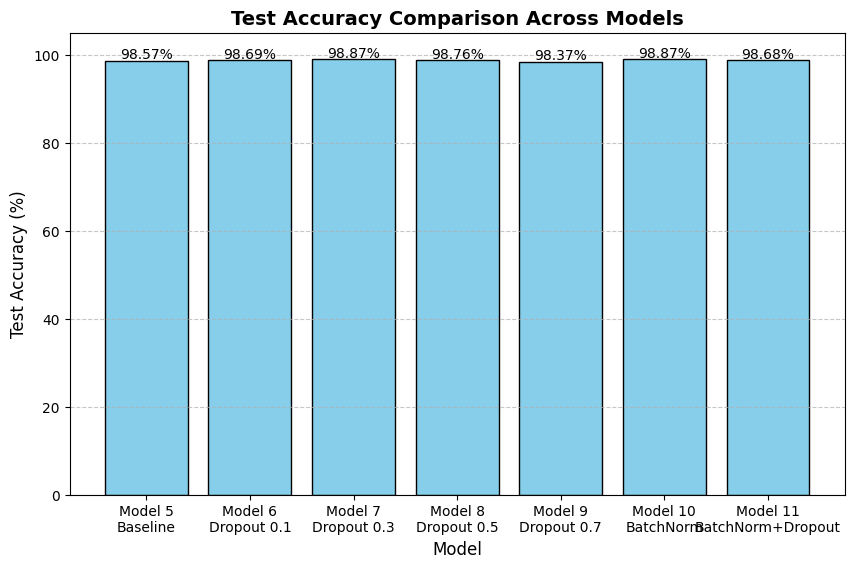

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

model_names = [
    'Model 5\nBaseline',
    'Model 6\nDropout 0.1',
    'Model 7\nDropout 0.3',
    'Model 8\nDropout 0.5',
    'Model 9\nDropout 0.7',
    'Model 10\nBatchNorm',
    'Model 11\nBatchNorm+Dropout'
]

test_accs = [
    test_acc5 * 100,
    test_acc6 * 100,
    test_acc7 * 100,
    test_acc8 * 100,
    test_acc9 * 100,
    test_acc10 * 100,
    test_acc11 * 100
]

# Plot
plt.figure(figsize=(10,6))
bars = plt.bar(model_names, test_accs, color='skyblue', edgecolor='black')

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             f'{bar.get_height():.2f}%', ha='center', fontsize=10)

plt.title('Test Accuracy Comparison Across Models', fontsize=14, weight='bold')
plt.ylabel('Test Accuracy (%)', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.ylim(0, 105)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Confusion Matrix:
[[1409    0    1    0    0    0    6    0    3    0]
 [   0 1593    7    4    1    0    0    0    1    1]
 [   1    1 1391    2    0    0    0    4    4    0]
 [   0    0    4 1425    0    4    0    1    2    1]
 [   0    1    1    0 1301    0    1    2    3   17]
 [   0    0    0    6    0 1231    6    2    4    0]
 [   0    2    2    0    0    2 1345    0    0    0]
 [   1    1    9    3    0    0    0 1472    0    2]
 [   4    2    0    5    0    1    5    1 1299    2]
 [   6    0    0    1    2    1    0    3    3 1385]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9916    0.9930    0.9923      1419
           1     0.9956    0.9913    0.9935      1607
           2     0.9830    0.9914    0.9872      1403
           3     0.9855    0.9916    0.9886      1437
           4     0.9977    0.9811    0.9894      1326
           5     0.9935    0.9856    0.9895      1249
       

<Figure size 800x800 with 0 Axes>

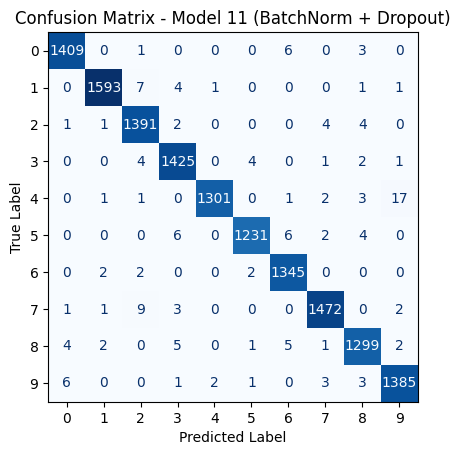

In [52]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import numpy as np
import matplotlib.pyplot as plt

# 1️⃣ Get predictions from model11
y_pred_probs = model11.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# 2️⃣ Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# 3️⃣ Print numeric results
print("Confusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))

# 4️⃣ Plot confusion matrix
plt.figure(figsize=(8, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', colorbar=False)
plt.title("Confusion Matrix - Model 11 (BatchNorm + Dropout)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


##### Fnal conclusion

All the errors are reduced because the CNN can capture spatial features, allowing it to better recognize shapes and patterns in the digits.

----

# Notes And Insights

## **When to Use Each Model**

`Logistic Regression` is suitable when your data is approximately linearly separable and your target has only two classes. It is very fast and simple, with only n+1 parameters.

`Softmax Regression` is used for multi-class classification problems. However, it still models only linear decision boundaries, so it cannot capture complex, nonlinear relationships in the data.  (n+1)*k param

`Neural Networks`, on the other hand, introduce nonlinearity through activation functions, allowing them to learn more complex decision boundaries. This makes them ideal for real-world problems where data is rarely linearly separable.

When the data consists of images, we want to take advantage of the spatial relationships between pixels — that is, how nearby pixels relate to each other. A standard fully connected neural network ignores this spatial structure, treating each pixel independently.
To handle this, we use `Convolutional Neural Networks (CNNs)`. CNNs use filters (kernels) with learnable weights that automatically extract meaningful spatial features such as edges, shapes, and textures. This makes CNNs the most effective approach for image classification tasks.

### **Dropout and Batch normalization**
We experimented with dropout and batch normalization in our models.
Dropout helps the network generalize better by randomly turning off a certain ratio of neurons during training. This prevents the model from relying too heavily on specific neurons and reduces overfitting.

Batch normalization, on the other hand, normalizes the inputs of each layer so that their values remain within a stable range. This makes the network less sensitive to weight initialization and learning rate, stabilizes training, and often speeds up convergence.

----

## Final Conclusion 
- we need non linear models, so we must use NN OR CNN .
- In the CNN model, the errors are much lower because it learns the spatial patterns of the digits.
Unlike the normal NN, which only sees pixel values, the CNN understands shapes and edges, so it recognizes digits more accurately.

<Figure size 800x800 with 0 Axes>

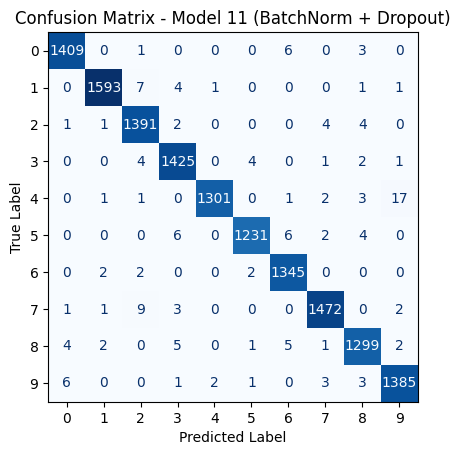

In [ ]:
plt.figure(figsize=(8, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', colorbar=False)
plt.title("Confusion Matrix - Model 11 (BatchNorm + Dropout)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


<Figure size 800x800 with 0 Axes>

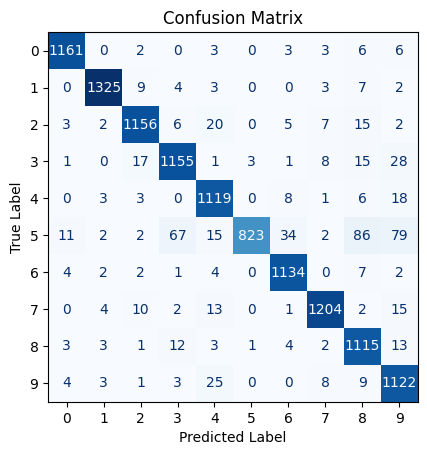

In [56]:
cm = confusion_matrix(all_labels, all_preds)

plt.figure(figsize=(8, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', colorbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()